In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


US county data.
The goal of this project is to segment the population data and find patterns within the data. These patterns can reveal feature-level similarities among US counties.
The dataset to be worked on is a US census demographic data which was obtained from Kaggle.
https://www.kaggle.com/muonneutrino/us-census-demographic-data

To segment the census data, two techniques will be used.
1. Principal Component Analysis for dimensionality reduction
2. K-meanss for clustering the data


The following steps will be implemented
- Data loading and exploration
- Data cleaning and pre-processing
- PCA for dimensionality reduction
- K-means to cluster the principal components

In [2]:
# Importing the relevant libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Upload the data to google drive
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving county_data.csv to county_data.csv
User uploaded file "county_data.csv" with length 622038 bytes


In [4]:
# Import the csv data to the notebook
county_census =  pd.read_csv('county_data.csv')
county_census

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,0.0,0.0,42838,18900,1219,10197,576,43.8,49.4,28.6,20.2,25.9,11.1,14.2,92.0,4.2,0.9,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,0.0,0.0,7045,16261,2414,11136,1459,36.8,68.2,20.9,38.4,16.4,16.9,7.3,76.3,16.9,0.0,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,0.0,0.0,18053,19893,1935,10449,1619,50.0,67.9,22.5,21.2,22.7,14.1,19.5,83.1,11.8,0.1,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,0.0,0.0,27523,15586,1467,8672,702,52.4,62.1,27.7,26.0,20.7,9.5,16.0,87.6,9.2,0.0,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4


In [5]:
census_df= county_census
census_df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


The data is explored and cleaned up next


In [7]:
# Check the shape of the data
census_df.shape

(3220, 37)

In [9]:
# Overview of the data
census_df.describe()

,CountyId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.00000,3220.000000,3220.000000,3220.000000,3219.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,1.007681e+05,4.958781e+04,5.118032e+04,11.296584,74.920186,8.681957,1.768416,1.289379,0.083416,7.130952e+04,48994.966770,3138.61677,25657.033230,1514.442547,16.780776,23.040634,31.479814,18.214286,21.878944,12.592360,15.835745,79.630963,9.851646,0.938975,3.244472,1.598696,4.736894,23.474534,4.709295e+04,74.863323,17.086118,7.772733,0.278820,6.665590
std,16292.078954,3.244996e+05,1.593212e+05,1.652164e+05,19.342522,23.056700,14.333571,7.422946,2.716191,0.709277,2.108691e+05,13877.178398,2405.78695,6667.520452,1156.708587,8.309360,11.891934,6.523912,3.742308,3.167228,4.143504,5.808383,7.663900,2.963054,3.072571,3.891510,1.678232,3.073484,5.687241,1.558159e+05,7.647916,6.390868,3.855454,0.448073,3.772612
min,1001.000000,7.400000e+01,3.900000e+01,3.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.900000e+01,11680.000000,262.00000,5943.000000,129.000000,2.400000,0.000000,11.400000,0.000000,4.800000,0.000000,0.000000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000,3.900000e+01,31.100000,4.400000,0.000000,0.000000,0.000000
25%,19032.500000,1.121350e+04,5.645500e+03,5.553500e+03,2.100000,63.500000,0.600000,0.100000,0.200000,0.000000,8.442250e+03,40622.000000,1729.75000,21568.000000,832.000000,11.475000,14.900000,27.200000,15.800000,19.900000,9.800000,11.500000,77.300000,8.000000,0.100000,1.400000,0.800000,2.900000,19.600000,4.573000e+03,71.200000,12.700000,5.200000,0.100000,4.475000
50%,30024.000000,2.584750e+04,1.287900e+04,1.299350e+04,4.100000,83.600000,2.000000,0.300000,0.600000,0.000000,1.969900e+04,47636.500000,2587.00000,25139.000000,1225.000000,15.400000,21.500000,30.500000,17.800000,22.100000,12.100000,15.400000,81.000000,9.500000,0.300000,2.300000,1.300000,4.100000,23.200000,1.061150e+04,76.100000,15.900000,6.800000,0.200000,6.100000
75%,46105.500000,6.660825e+04,3.301725e+04,3.359375e+04,10.000000,92.800000,9.500000,0.600000,1.200000,0.100000,5.036575e+04,55476.000000,3802.00000,28997.000000,1802.500000,19.800000,28.600000,34.900000,20.200000,23.900000,14.800000,19.500000,84.100000,11.300000,0.800000,3.825000,1.900000,5.800000,27.000000,2.874725e+04,80.200000,19.900000,9.200000,0.300000,8.000000
max,72153.000000,1.010572e+07,4.979641e+06,5.126081e+06,100.000000,100.000000,86.900000,90.300000,41.800000,33.700000,6.218279e+06,129588.000000,41001.00000,69529.000000,16145.000000,65.200000,83.600000,69.000000,46.400000,37.200000,36.400000,48.700000,97.200000,29.300000,61.800000,59.200000,43.200000,33.000000,45.100000,4.805817e+06,88.800000,64.800000,38.000000,8.000000,40.900000


In [10]:
# check for missing values, if there are missing values, the number of entries == the number of non-null for each column
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyId          3220 non-null   int64  
 1   State             3220 non-null   object 
 2   County            3220 non-null   object 
 3   TotalPop          3220 non-null   int64  
 4   Men               3220 non-null   int64  
 5   Women             3220 non-null   int64  
 6   Hispanic          3220 non-null   float64
 7   White             3220 non-null   float64
 8   Black             3220 non-null   float64
 9   Native            3220 non-null   float64
 10  Asian             3220 non-null   float64
 11  Pacific           3220 non-null   float64
 12  VotingAgeCitizen  3220 non-null   int64  
 13  Income            3220 non-null   int64  
 14  IncomeErr         3220 non-null   int64  
 15  IncomePerCap      3220 non-null   int64  
 16  IncomePerCapErr   3220 non-null   int64  


Looks like there aren't any missing values

In [11]:
# Check the columns in the data
census_df_columns = census_df.columns
census_df_columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [12]:
census_df.tail()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,0.0,0.0,42838,18900,1219,10197,576,43.8,49.4,28.6,20.2,25.9,11.1,14.2,92.0,4.2,0.9,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,0.0,0.0,7045,16261,2414,11136,1459,36.8,68.2,20.9,38.4,16.4,16.9,7.3,76.3,16.9,0.0,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,0.0,0.0,18053,19893,1935,10449,1619,50.0,67.9,22.5,21.2,22.7,14.1,19.5,83.1,11.8,0.1,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,0.0,0.0,27523,15586,1467,8672,702,52.4,62.1,27.7,26.0,20.7,9.5,16.0,87.6,9.2,0.0,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4
3219,72153,Puerto Rico,Yauco Municipio,37585,18052,19533,99.8,0.2,0.0,0.0,0.0,0.0,29763,14451,1371,8124,445,50.4,58.2,30.4,20.2,25.6,12.6,11.3,82.8,8.2,2.2,1.7,0.1,5.0,24.4,8995,66.4,28.7,5.0,0.0,24.0


In [13]:
# By observing the data, the countyId column looks redundant and serves no purpose for the objective of the data.
# drop the countyId column
cleaned_census_df = census_df.drop(columns = 'CountyId')
cleaned_census_df.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [14]:
# Another cleaning that can be done to the data to make it easy for further exploration is by indexing the data by state-county
cleaned_census_df.index = cleaned_census_df['State'] + "-" + cleaned_census_df['County']
cleaned_census_df.head()


,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Alabama-Autauga County,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
Alabama-Baldwin County,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
Alabama-Barbour County,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
Alabama-Bibb County,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
Alabama-Blount County,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [15]:
# drop the State and County columns since they are redundant now
drop = ['State', 'County']
cleaned_census_df = cleaned_census_df.drop(columns = drop)
cleaned_census_df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Alabama-Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
Alabama-Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
Alabama-Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
Alabama-Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
Alabama-Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [16]:
# Check for NaN or missing data
cleaned_census_df.isnull().sum() # Child Poverty column has 1 NaN value
# Replace NaN with the mean of the column
cleaned_census_df.fillna(cleaned_census_df.mean(), inplace=True)

In [17]:
cleaned_census_df.fillna(cleaned_census_df.mean(), inplace=True)

Time to get an overview of the data visually. Using a histogram, the distribution of data points can be shown.

In [18]:
cleaned_census_df.isnull().sum()

TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

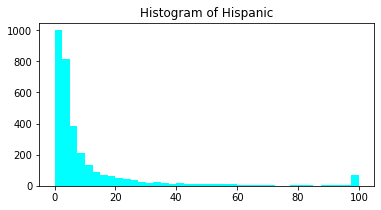

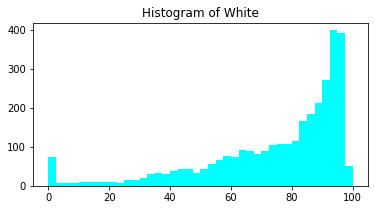

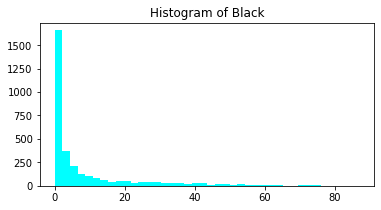

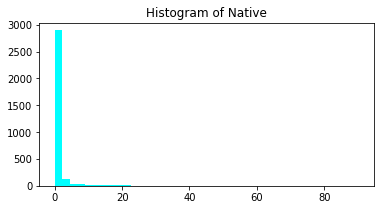

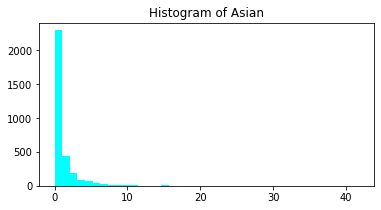

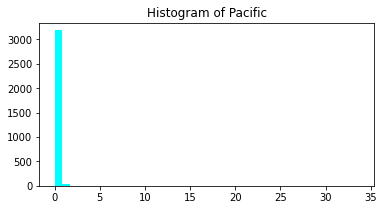

In [19]:
# Plot a histogram to compare the ethnicities all over the counties in US
# The x-axis shows the different bins and the y-axis shows data occurences within each bin

ethnicity = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
n_bins = 40

for ethnicities in ethnicity:
    ax=plt.subplots(figsize=(6,3))
    # get data by column_name(ethnicity) and display a histogram
    ax = plt.hist(cleaned_census_df[ethnicities], bins=n_bins, color='aqua')
    title="Histogram of " + ethnicities
    plt.title(title, fontsize=12)
    plt.show()

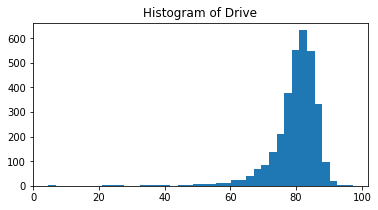

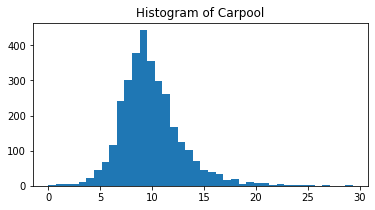

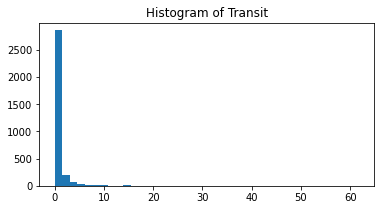

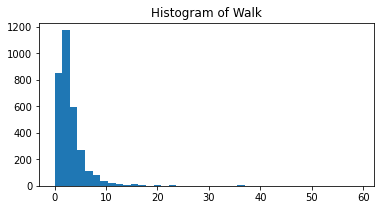

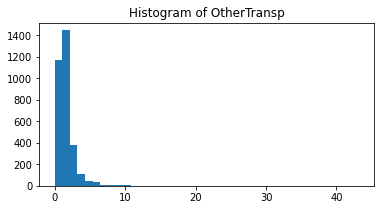

In [20]:
transport_list = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']
n_bins = 40 # define the size of the bin

for transportation in transport_list:
    ax=plt.subplots(figsize=(6,3))
    # get data by column_name(transportation) and display a histogram
    ax = plt.hist(cleaned_census_df[transportation], bins=n_bins)
    title="Histogram of " + transportation
    plt.title(title, fontsize=12)
    plt.show()

### Normalize the data
This is to make sure feature measurements are comparable and consistent. A 'MinMax Scaler' can be used to transform all the numerical values so that they all fall between 0 and 1.
PCA is affected by scale hence it is important to
normalize the features. Normalization changes the
values of the features to a common scale but the
proportion between one value and another remains
the same

In [21]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler=MinMaxScaler()
census_scaled = pd.DataFrame(scaler.fit_transform(cleaned_census_df.astype(float)))
census_scaled.columns = cleaned_census_df.columns
census_scaled.index=cleaned_census_df.index

census_scaled.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Alabama-Autauga County,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,0.370094,0.063232,0.344117,0.118319,0.179936,0.240431,0.414931,0.387931,0.567901,0.222527,0.316222,0.879050,0.327645,0.001618,0.010135,0.030093,0.075758,0.5175,0.005009,0.745234,0.261589,0.147368,0.0125,0.127139
Alabama-Baldwin County,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,0.346728,0.026658,0.368336,0.037837,0.149682,0.192584,0.421875,0.392241,0.641975,0.266484,0.221766,0.865011,0.259386,0.001618,0.013514,0.025463,0.169697,0.5475,0.018621,0.859619,0.140728,0.165789,0.0125,0.134474
Alabama-Barbour County,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,0.183940,0.056187,0.182713,0.041771,0.394904,0.537081,0.236111,0.362069,0.549383,0.315934,0.494867,0.850972,0.378840,0.004854,0.037162,0.039352,0.039394,0.4575,0.001839,0.745234,0.243377,0.171053,0.0375,0.303178
Alabama-Bibb County,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,0.269057,0.077788,0.235398,0.109890,0.203822,0.318182,0.225694,0.379310,0.459877,0.436813,0.459959,0.883369,0.324232,0.011327,0.005068,0.039352,0.045455,0.6225,0.001692,0.778163,0.215232,0.165789,0.0375,0.200489
Alabama-Blount County,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,0.303050,0.058126,0.252854,0.045017,0.210191,0.303828,0.296875,0.278017,0.570988,0.434066,0.400411,0.887689,0.348123,0.001618,0.006757,0.009259,0.063636,0.7475,0.004441,0.915078,0.124172,0.105263,0.0125,0.119804


### Dimensionality Reduction
PCA extracts a new set of variables
from a larger set of variables. These extracted
variables are the principal components. The first
component typically explains the maximum variance
in the data set and therefore determines the largest
variability in the data.

In [24]:
from sklearn.decomposition import PCA

In [25]:
# Make an instance of the Model
pca = PCA(.80)

PCA is used to fit the normalized data. As a
result, a new dimensionality-reduced data is created.
With the newly created data, 80% was selected as the
amount of data variance that must be accounted for
by the top principal components.

In [28]:
principalComponents = pca.fit_transform(census_scaled)
principalComponents

array([[-0.05484957, -0.10041641,  0.12592011, ..., -0.02490765,
        -0.02744547,  0.00322021],
       [-0.17569817, -0.08751347,  0.18960851, ..., -0.09411368,
        -0.07940817, -0.06130151],
       [ 0.49436912, -0.36525561, -0.06929527, ...,  0.09946185,
         0.10188568, -0.06344504],
       ...,
       [ 1.43486391,  0.2582226 , -0.12525909, ..., -0.07486272,
        -0.16906213, -0.0272413 ],
       [ 1.4475424 ,  0.19094515, -0.00787474, ..., -0.22271497,
        -0.19168358,  0.00631256],
       [ 1.37422769,  0.2775036 ,  0.044132  , ..., -0.25076394,
        -0.09682021, -0.10005317]])

After fitting the
PCA instance, 80% of the variance amounts to 7
Principal components

In [29]:
principal_components=pca.n_components_
principal_components

7

Since the top 7 components captured 80% of the
variance, it is possible to determine the smallest
number of principal components that capture at least
80% of the total variance in the data. This is done
because it is important to retain as much information
as possible. This is the explained variance and it tells
how much information(variance) can be attributed to
each of the principal components.

([<matplotlib.axis.XTick at 0x7f4cc4f8dcc0>,
 <a list of 7 Text major ticklabel objects>)

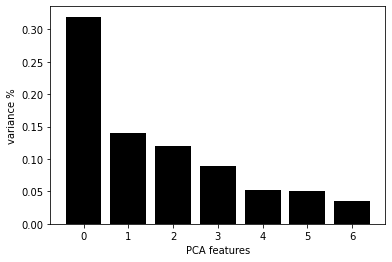

In [30]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

The plot shows that the first principal component
explains most of the variance followed by the
second

In [31]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Is it possible to visualize the first two
principal components to check for any clear clusters?

Text(0, 0.5, 'PCA 2')

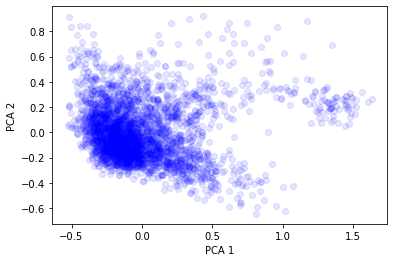

In [32]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

The factoid above shows that the observations in the
census dataset can be grouped.

In [33]:
from sklearn.cluster import KMeans
%config InlineBackend.figure_format='retina'

Next, PCA is combined with K-means by using the
scores obtained by PCA for the fit to segment the
data. The first three principal components were fit to
the k-means algorithm to help determine the best
number of clusters.

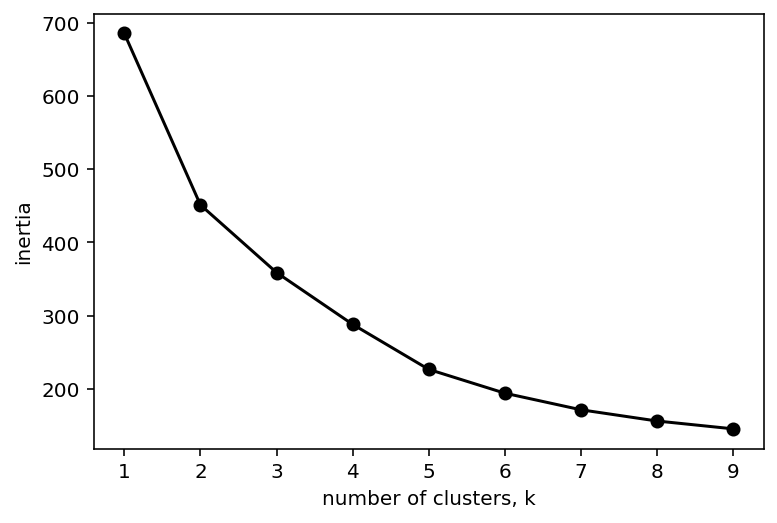

In [34]:
# To determine the number of clusters for the K-means algorithm, the algorithm is tested up to 9 clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The screen plot shows that after 3 clusters at (the
elbow method) the change in the value of inertia is
not very significant, neither is the variance of the
subsequent data. Hence, everything after k=3 is
discarded

Now run k-means with cluster = 3



In [35]:

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)
    
# Fit model to samples
model.fit(PCA_components.iloc[:,:3])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

The point of PCA was to determine the
most important components. Thus, it can be inferred
that the first two components explain more variance
than the third one. K-means clustering is then done
on the PCA results.

In [36]:
# Create a new dataframe with the original features and add the PCA scores and assisgned clusters
df_seg_pca_kmeans = pd.concat([cleaned_census_df.reset_index(drop=True), pd.DataFrame(PCA_components.iloc[:,:3])], axis = 1)
df_seg_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# The last column we add contains the pca k-means clustering labels
df_seg_pca_kmeans['Segment k-means PCA'] = model.labels_

In [37]:
df_seg_pca_kmeans.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Component 1,Component 2,Component 3,Segment k-means PCA
0,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,-0.054850,-0.100416,0.125920,0
1,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,-0.175698,-0.087513,0.189609,0
2,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4,0.494369,-0.365256,-0.069295,2
3,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,0.061900,-0.263645,-0.097809,2
4,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,-0.097111,-0.268819,0.009373,0


In [38]:
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
# Add the names of the segments to the labels
# We create a new column named ‘Segment’ and map the four clusters directly inside it
df_seg_pca_kmeans['Segment'] = df_seg_pca_kmeans['Segment k-means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2:'third'})


In [40]:
color_dict = dict({'first':'blue',
                  'second':'green',
                  'third': 'orange'})

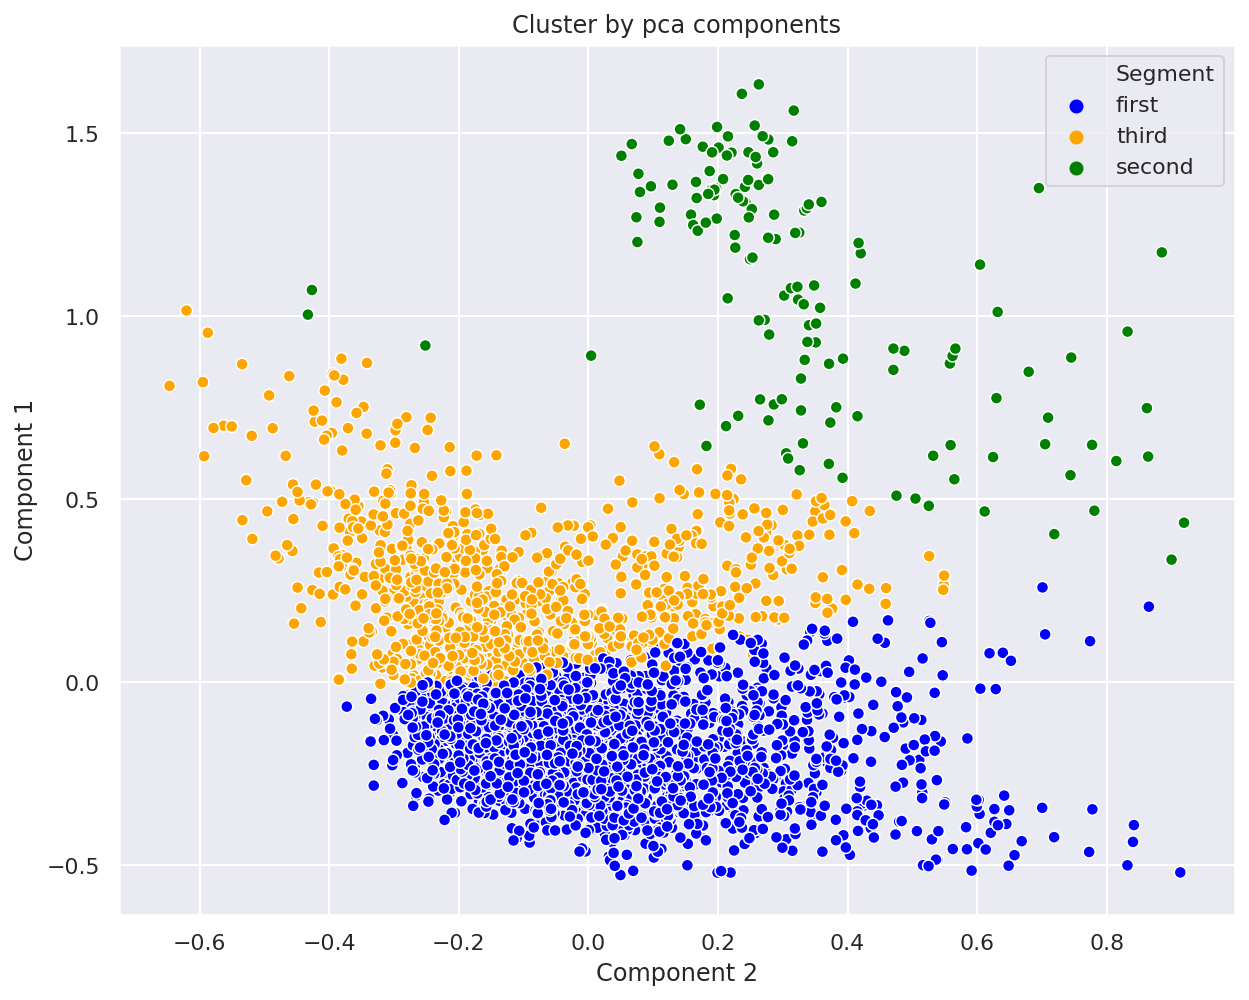

In [41]:
# visualizing clusters on a 2D plane with respect to the first two components
# The point of PCA was to determine the most important components

# Plot the data by PCA components. The y axis is the first component, X axis is the second
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_seg_pca_kmeans['Segment'], palette=color_dict)
plt.title('Cluster by pca components')
plt.show()

By combining PCA with K-means the separate clusters
can be very well observed.

In [42]:
# Applying K-means without PCA resulted in poor clustering
# Create a KMeans instance with 3 clusters: model 
model3 = KMeans(n_clusters=3)
    
# Fit model to samples
model3.fit(census_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
color_dict = dict({'first':'blue',
                  'second':'green',
                  'third': 'orange'})

In [44]:
census_scaled['Segment k-means'] = model3.labels_

In [45]:
census_scaled.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Segment k-means
Alabama-Autauga County,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,0.370094,0.063232,0.344117,0.118319,0.179936,0.240431,0.414931,0.387931,0.567901,0.222527,0.316222,0.879050,0.327645,0.001618,0.010135,0.030093,0.075758,0.5175,0.005009,0.745234,0.261589,0.147368,0.0125,0.127139,0
Alabama-Baldwin County,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,0.346728,0.026658,0.368336,0.037837,0.149682,0.192584,0.421875,0.392241,0.641975,0.266484,0.221766,0.865011,0.259386,0.001618,0.013514,0.025463,0.169697,0.5475,0.018621,0.859619,0.140728,0.165789,0.0125,0.134474,0
Alabama-Barbour County,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,0.183940,0.056187,0.182713,0.041771,0.394904,0.537081,0.236111,0.362069,0.549383,0.315934,0.494867,0.850972,0.378840,0.004854,0.037162,0.039352,0.039394,0.4575,0.001839,0.745234,0.243377,0.171053,0.0375,0.303178,2
Alabama-Bibb County,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,0.269057,0.077788,0.235398,0.109890,0.203822,0.318182,0.225694,0.379310,0.459877,0.436813,0.459959,0.883369,0.324232,0.011327,0.005068,0.039352,0.045455,0.6225,0.001692,0.778163,0.215232,0.165789,0.0375,0.200489,2
Alabama-Blount County,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,0.303050,0.058126,0.252854,0.045017,0.210191,0.303828,0.296875,0.278017,0.570988,0.434066,0.400411,0.887689,0.348123,0.001618,0.006757,0.009259,0.063636,0.7475,0.004441,0.915078,0.124172,0.105263,0.0125,0.119804,0


In [46]:
# We create a new column named ‘Segment’ and map the three clusters directly inside it
census_scaled['Segment'] = census_scaled['Segment k-means'].map({0:'first',
                                                                        1:'second',
                                                                             2:'third'})


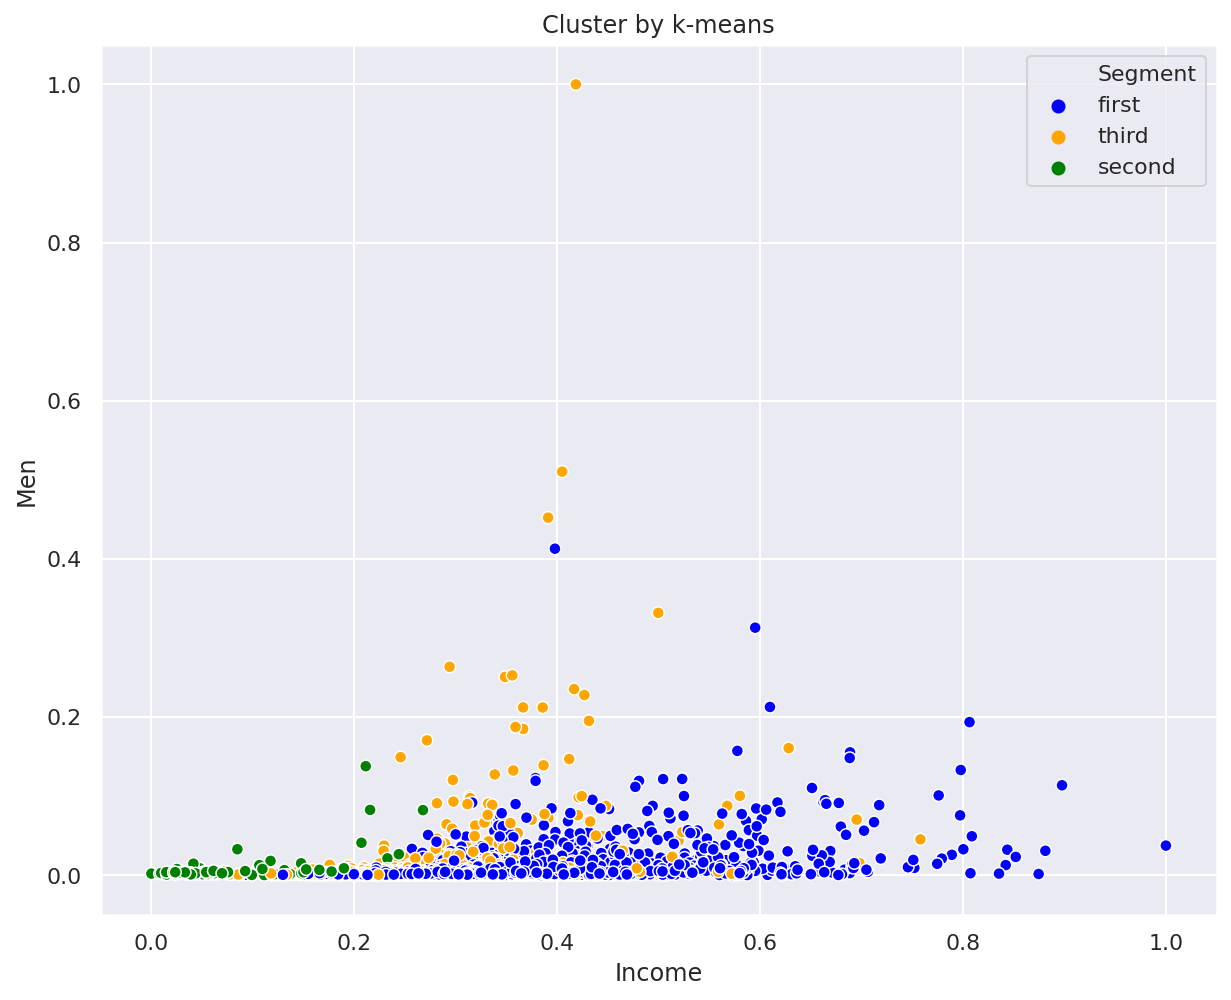

In [47]:
# Running k-means without the pca step
x_axis = census_scaled['Income']
y_axis = census_scaled['Men']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=census_scaled['Segment'] , palette=color_dict)
plt.title('Cluster by k-means')
plt.show()

 In the instance above, only
the yellow cluster separated from the rest to
some extent. The blue and green clusters are
jumbled together.
